In [1]:
import pandas as pd

# Path to the combined CSV file
combined_file_path = r'D:\Data\data_sets_2021_2024\2023\grand-total-combined-data-updated.csv'

# Read the combined CSV file into a DataFrame
combined_data = pd.read_csv(combined_file_path)

# Display the first few columns
print("First few columns:")
print(combined_data.head())

# Display the last few columns
print("\nLast few columns:")
print(combined_data.tail())


First few columns:
        Month              Falls within  Longitude   Latitude  \
0  2023-01-31  British Transport Police  -0.236429  50.832550   
1  2023-01-31  British Transport Police  -0.236429  50.832550   
2  2023-01-31  British Transport Police  -0.271753  50.834329   
3  2023-01-31  British Transport Police  -0.271753  50.834329   
4  2023-01-31  British Transport Police  -0.271753  50.834329   

                               Location  LSOA name  \
0        On or near Southwick (Station)  Adur 004G   
1        On or near Southwick (Station)  Adur 004G   
2  On or near Shoreham-By-Sea (Station)  Adur 005C   
3  On or near Shoreham-By-Sea (Station)  Adur 005C   
4  On or near Shoreham-By-Sea (Station)  Adur 005C   

                     Crime type  
0                 Bicycle theft  
1  Violence and sexual offences  
2                 Bicycle theft  
3                 Bicycle theft  
4  Violence and sexual offences  

Last few columns:
              Month        Falls within  L

In [2]:
# Check for null values in each column
null_values = combined_data.isnull().sum()

# Display the null values count for each column
print("Null values count for each column:")
print(null_values)


Null values count for each column:
Month               0
Falls within        0
Longitude       52806
Latitude        52806
Location            0
LSOA name       59582
Crime type          0
dtype: int64


In [3]:
# Filter rows where 'LSOA name' is null
null_lsoa_name = combined_data[combined_data['LSOA name'].isnull()]

# Display the rows where 'LSOA name' is null
print("Rows where 'LSOA name' is null:")
print(null_lsoa_name)


Rows where 'LSOA name' is null:
              Month                 Falls within  Longitude   Latitude  \
4770     2023-01-31     British Transport Police  -2.973809  56.456457   
4771     2023-01-31     British Transport Police  -2.979554  51.517459   
4772     2023-01-31     British Transport Police  -4.269819  51.507984   
4773     2023-01-31     British Transport Police  -4.153935  55.921253   
4774     2023-01-31     British Transport Police  -4.405643  55.907202   
...             ...                          ...        ...        ...   
3382112  2023-12-31  Metropolitan Police Service        NaN        NaN   
3382113  2023-12-31  Metropolitan Police Service        NaN        NaN   
3382114  2023-12-31  Metropolitan Police Service        NaN        NaN   
3382115  2023-12-31  Metropolitan Police Service        NaN        NaN   
3382116  2023-12-31  Metropolitan Police Service        NaN        NaN   

                                           Location LSOA name  \
4770          

In [4]:
# Filter rows where Latitude or Longitude is null
null_location = combined_data[combined_data['Latitude'].isnull() | combined_data['Longitude'].isnull()]

# Display the relevant columns for these rows
print("Rows with null Latitude or Longitude:")
print(null_location[['Falls within', 'Longitude', 'Latitude']])


Rows with null Latitude or Longitude:
                        Falls within  Longitude  Latitude
5657           City of London Police        NaN       NaN
5658           City of London Police        NaN       NaN
5659           City of London Police        NaN       NaN
5660           City of London Police        NaN       NaN
5661           City of London Police        NaN       NaN
...                              ...        ...       ...
3382112  Metropolitan Police Service        NaN       NaN
3382113  Metropolitan Police Service        NaN       NaN
3382114  Metropolitan Police Service        NaN       NaN
3382115  Metropolitan Police Service        NaN       NaN
3382116  Metropolitan Police Service        NaN       NaN

[52806 rows x 3 columns]


In [5]:
# Filter rows where Falls within is "City of London Police" and Latitude or Longitude is null
city_of_london_null_location = combined_data[(combined_data['Falls within'] == 'City of London Police') & 
                                             (combined_data['Latitude'].isnull() | combined_data['Longitude'].isnull())]

# Replace null Latitude and Longitude with fixed coordinates
combined_data.loc[(combined_data['Falls within'] == 'City of London Police') & 
                  (combined_data['Latitude'].isnull() | combined_data['Longitude'].isnull()), 'Latitude'] = 51.5072
combined_data.loc[(combined_data['Falls within'] == 'City of London Police') & 
                  (combined_data['Latitude'].isnull() | combined_data['Longitude'].isnull()), 'Longitude'] = -0.1276

# Print first few rows
print("First few rows after replacing null Latitude and Longitude:")
print(combined_data.head())

# Print last few rows
print("\nLast few rows after replacing null Latitude and Longitude:")
print(combined_data.tail())


First few rows after replacing null Latitude and Longitude:
        Month              Falls within  Longitude   Latitude  \
0  2023-01-31  British Transport Police  -0.236429  50.832550   
1  2023-01-31  British Transport Police  -0.236429  50.832550   
2  2023-01-31  British Transport Police  -0.271753  50.834329   
3  2023-01-31  British Transport Police  -0.271753  50.834329   
4  2023-01-31  British Transport Police  -0.271753  50.834329   

                               Location  LSOA name  \
0        On or near Southwick (Station)  Adur 004G   
1        On or near Southwick (Station)  Adur 004G   
2  On or near Shoreham-By-Sea (Station)  Adur 005C   
3  On or near Shoreham-By-Sea (Station)  Adur 005C   
4  On or near Shoreham-By-Sea (Station)  Adur 005C   

                     Crime type  
0                 Bicycle theft  
1  Violence and sexual offences  
2                 Bicycle theft  
3                 Bicycle theft  
4  Violence and sexual offences  

Last few rows after

In [6]:
# Check for null values in each column
null_values_after_replacement = combined_data.isnull().sum()

# Display the null values count for each column
print("Null values count for each column after replacing null Latitude and Longitude:")
print(null_values_after_replacement)


Null values count for each column after replacing null Latitude and Longitude:
Month               0
Falls within        0
Longitude       51109
Latitude        51109
Location            0
LSOA name       59582
Crime type          0
dtype: int64


In [7]:
# Group the data by the "Falls within" column
grouped_data = combined_data.groupby('Falls within')

# Iterate over each group to check for null Latitude and Longitude
for falls_within, group_df in grouped_data:
    null_location = group_df[group_df['Latitude'].isnull() | group_df['Longitude'].isnull()]
    if not null_location.empty:
        print("Null Latitude and Longitude values for category '{}':".format(falls_within))
        print(null_location[['Latitude', 'Longitude']])


Null Latitude and Longitude values for category 'Metropolitan Police Service':
         Latitude  Longitude
105012        NaN        NaN
105013        NaN        NaN
105014        NaN        NaN
105015        NaN        NaN
105016        NaN        NaN
...           ...        ...
3382112       NaN        NaN
3382113       NaN        NaN
3382114       NaN        NaN
3382115       NaN        NaN
3382116       NaN        NaN

[51076 rows x 2 columns]
Null Latitude and Longitude values for category 'Northumbria Police':
        Latitude  Longitude
121562       NaN        NaN
121563       NaN        NaN
121564       NaN        NaN
121565       NaN        NaN
121566       NaN        NaN
121567       NaN        NaN
121568       NaN        NaN
121569       NaN        NaN
121570       NaN        NaN
121571       NaN        NaN
121572       NaN        NaN
243135       NaN        NaN
243136       NaN        NaN
243137       NaN        NaN
243138       NaN        NaN
243139       NaN        NaN
2

In [8]:
# Define rounded-off coordinates for Greater London
greater_london_latitude = 51.5072
greater_london_longitude = -0.1276

# Replace null Latitude and Longitude with rounded-off coordinates for 'Metropolitan Police Service'
mask = (combined_data['Falls within'] == 'Metropolitan Police Service') & (combined_data['Latitude'].isnull() | combined_data['Longitude'].isnull())
combined_data.loc[mask, 'Latitude'] = greater_london_latitude
combined_data.loc[mask, 'Longitude'] = greater_london_longitude

# Verify the changes
print("Null Latitude and Longitude values replaced with rounded-off coordinates for 'Metropolitan Police Service'.")


Null Latitude and Longitude values replaced with rounded-off coordinates for 'Metropolitan Police Service'.


In [9]:
# Check for null values in each column
null_values_after_replacement = combined_data.isnull().sum()

# Display the null values count for each column
print("Null values count for each column after replacing null Latitude and Longitude for 'Metropolitan Police Service':")
print(null_values_after_replacement)


Null values count for each column after replacing null Latitude and Longitude for 'Metropolitan Police Service':
Month               0
Falls within        0
Longitude          33
Latitude           33
Location            0
LSOA name       59582
Crime type          0
dtype: int64


In [10]:
# Define actual coordinates for Newcastle
newcastle_latitude = 54.9783
newcastle_longitude = -1.6174

# Replace null Latitude and Longitude with actual coordinates for 'Northumbria Police'
mask = (combined_data['Falls within'] == 'Northumbria Police') & (combined_data['Latitude'].isnull() | combined_data['Longitude'].isnull())
combined_data.loc[mask, 'Latitude'] = newcastle_latitude
combined_data.loc[mask, 'Longitude'] = newcastle_longitude

# Verify the changes
print("Null Latitude and Longitude values replaced with actual coordinates for 'Northumbria Police'.")


Null Latitude and Longitude values replaced with actual coordinates for 'Northumbria Police'.


In [11]:
# Check for null values in each column
null_values_after_replacement = combined_data.isnull().sum()

# Display the null values count for each column
print("Null values count for each column after replacing null Latitude and Longitude for 'Northumbria Police':")
print(null_values_after_replacement)


Null values count for each column after replacing null Latitude and Longitude for 'Northumbria Police':
Month               0
Falls within        0
Longitude           0
Latitude            0
Location            0
LSOA name       59582
Crime type          0
dtype: int64


In [12]:
# Filter rows where 'LSOA name' is null
null_lsoa_name = combined_data[combined_data['LSOA name'].isnull()]

# Display the rows where 'LSOA name' is null
print("Rows where 'LSOA name' is null:")
print(null_lsoa_name)


Rows where 'LSOA name' is null:
              Month                 Falls within  Longitude   Latitude  \
4770     2023-01-31     British Transport Police  -2.973809  56.456457   
4771     2023-01-31     British Transport Police  -2.979554  51.517459   
4772     2023-01-31     British Transport Police  -4.269819  51.507984   
4773     2023-01-31     British Transport Police  -4.153935  55.921253   
4774     2023-01-31     British Transport Police  -4.405643  55.907202   
...             ...                          ...        ...        ...   
3382112  2023-12-31  Metropolitan Police Service  -0.127600  51.507200   
3382113  2023-12-31  Metropolitan Police Service  -0.127600  51.507200   
3382114  2023-12-31  Metropolitan Police Service  -0.127600  51.507200   
3382115  2023-12-31  Metropolitan Police Service  -0.127600  51.507200   
3382116  2023-12-31  Metropolitan Police Service  -0.127600  51.507200   

                                           Location LSOA name  \
4770          

In [13]:
# Group the data by 'Falls within' and 'Crime type'
grouped_data = combined_data.groupby(['Falls within', 'Crime type'])

# Iterate over each group to check for null 'LSOA name'
for (falls_within, crime_type), group_df in grouped_data:
    null_lsoa_name = group_df[group_df['LSOA name'].isnull()]
    if not null_lsoa_name.empty:
        print("Null 'LSOA name' values for Falls within: '{}', Crime type: '{}':".format(falls_within, crime_type))
        print(null_lsoa_name[['Falls within', 'Crime type', 'LSOA name']])


Null 'LSOA name' values for Falls within: 'British Transport Police', Crime type: 'Bicycle theft':
                     Falls within     Crime type LSOA name
4770     British Transport Police  Bicycle theft       NaN
4771     British Transport Police  Bicycle theft       NaN
4772     British Transport Police  Bicycle theft       NaN
126343   British Transport Police  Bicycle theft       NaN
126344   British Transport Police  Bicycle theft       NaN
...                           ...            ...       ...
3275733  British Transport Police  Bicycle theft       NaN
3275734  British Transport Police  Bicycle theft       NaN
3275735  British Transport Police  Bicycle theft       NaN
3275736  British Transport Police  Bicycle theft       NaN
3275737  British Transport Police  Bicycle theft       NaN

[200 rows x 3 columns]
Null 'LSOA name' values for Falls within: 'British Transport Police', Crime type: 'Burglary':
                     Falls within Crime type LSOA name
369805   British Tra

In [14]:
# Get unique values in the 'Falls within' column
unique_falls_within = combined_data['Falls within'].unique()

# Iterate over each unique value in 'Falls within' column
for falls_within_value in unique_falls_within:
    # Filter the data for the current 'Falls within' value where 'LSOA name' is null
    null_lsoa_name = combined_data.loc[(combined_data['Falls within'] == falls_within_value) & (combined_data['LSOA name'].isnull())]
    
    # If there are null values, print the count
    if not null_lsoa_name.empty:
        print("Null 'LSOA name' values for Falls within: '{}' - Count: {}".format(falls_within_value, len(null_lsoa_name)))


Null 'LSOA name' values for Falls within: 'British Transport Police' - Count: 6774
Null 'LSOA name' values for Falls within: 'City of London Police' - Count: 1697
Null 'LSOA name' values for Falls within: 'Metropolitan Police Service' - Count: 51076
Null 'LSOA name' values for Falls within: 'Northumbria Police' - Count: 35


In [15]:
# Replace null values in 'LSOA name' with "no name"
combined_data['LSOA name'].fillna("no name", inplace=True)

# Verify the changes
print("Null values in 'LSOA name' replaced with 'no name'.")



Null values in 'LSOA name' replaced with 'no name'.


C:\Users\USER\AppData\Local\Temp\ipykernel_24132\1357737688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['LSOA name'].fillna("no name", inplace=True)


In [16]:
# Check for null values in each column
null_values_after_replacement = combined_data.isnull().sum()

# Display the null values count for each column
print("Null values count for each column after replacing null values in 'LSOA name' with 'no name':")
print(null_values_after_replacement)


Null values count for each column after replacing null values in 'LSOA name' with 'no name':
Month           0
Falls within    0
Longitude       0
Latitude        0
Location        0
LSOA name       0
Crime type      0
dtype: int64


In [17]:
# Print the first 20 rows
print("First 20 rows:")
print(combined_data.head(20))

# Print the last 20 rows
print("\nLast 20 rows:")
print(combined_data.tail(20))


First 20 rows:
         Month              Falls within  Longitude   Latitude  \
0   2023-01-31  British Transport Police  -0.236429  50.832550   
1   2023-01-31  British Transport Police  -0.236429  50.832550   
2   2023-01-31  British Transport Police  -0.271753  50.834329   
3   2023-01-31  British Transport Police  -0.271753  50.834329   
4   2023-01-31  British Transport Police  -0.271753  50.834329   
5   2023-01-31  British Transport Police  -0.271753  50.834329   
6   2023-01-31  British Transport Police  -0.323071  50.826947   
7   2023-01-31  British Transport Police  -0.323071  50.826947   
8   2023-01-31  British Transport Police  -3.558622  54.645028   
9   2023-01-31  British Transport Police  -3.558622  54.645028   
10  2023-01-31  British Transport Police  -3.558622  54.645028   
11  2023-01-31  British Transport Police  -3.558622  54.645028   
12  2023-01-31  British Transport Police  -1.369872  53.100675   
13  2023-01-31  British Transport Police  -1.369872  53.10067

In [18]:
# Print the last 20 rows
print("\nLast 20 rows:")
print(combined_data[-20:])



Last 20 rows:
              Month        Falls within  Longitude   Latitude  \
3395516  2023-12-31  Northumbria Police  -1.435072  54.807839   
3395517  2023-12-31  Northumbria Police  -1.429283  54.804622   
3395518  2023-12-31  Northumbria Police  -1.440163  54.806434   
3395519  2023-12-31  Northumbria Police  -1.437309  54.823043   
3395520  2023-12-31  Northumbria Police  -1.437309  54.823043   
3395521  2023-12-31  Northumbria Police  -1.426736  54.804296   
3395522  2023-12-31  Northumbria Police  -1.435072  54.807839   
3395523  2023-12-31  Northumbria Police  -1.429283  54.804622   
3395524  2023-12-31  Northumbria Police  -1.437309  54.823043   
3395525  2023-12-31  Northumbria Police  -1.437309  54.823043   
3395526  2023-12-31  Northumbria Police  -1.437309  54.823043   
3395527  2023-12-31  Northumbria Police  -1.433195  54.804101   
3395528  2023-12-31  Northumbria Police  -1.433900  54.803727   
3395529  2023-12-31  Northumbria Police  -1.433195  54.804101   
3395530  2

In [19]:
# Summary of the dataset
print("Summary of the dataset:")
print(combined_data.info())

# Types of variables
print("\nTypes of variables:")
print(combined_data.dtypes)

# Unique values for each column
print("\nUnique values for each column:")
for column in combined_data.columns:
    unique_values = combined_data[column].nunique()
    print(f"{column}: {unique_values} unique values")


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395536 entries, 0 to 3395535
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Month         object 
 1   Falls within  object 
 2   Longitude     float64
 3   Latitude      float64
 4   Location      object 
 5   LSOA name     object 
 6   Crime type    object 
dtypes: float64(2), object(5)
memory usage: 181.3+ MB
None

Types of variables:
Month            object
Falls within     object
Longitude       float64
Latitude        float64
Location         object
LSOA name        object
Crime type       object
dtype: object

Unique values for each column:
Month: 12 unique values
Falls within: 5 unique values
Longitude: 91609 unique values
Latitude: 88273 unique values
Location: 57354 unique values
LSOA name: 11038 unique values
Crime type: 14 unique values


In [20]:
# Convert 'Month' column to date type format
combined_data['Month'] = pd.to_datetime(combined_data['Month'])

# Verify the changes
print("Data type of 'Month' column after conversion:")
print(combined_data['Month'].dtype)


Data type of 'Month' column after conversion:
datetime64[ns]


In [21]:
# Print the last 20 rows
print("\nLast 20 rows:")
print(combined_data[-20:])


Last 20 rows:
             Month        Falls within  Longitude   Latitude  \
3395516 2023-12-31  Northumbria Police  -1.435072  54.807839   
3395517 2023-12-31  Northumbria Police  -1.429283  54.804622   
3395518 2023-12-31  Northumbria Police  -1.440163  54.806434   
3395519 2023-12-31  Northumbria Police  -1.437309  54.823043   
3395520 2023-12-31  Northumbria Police  -1.437309  54.823043   
3395521 2023-12-31  Northumbria Police  -1.426736  54.804296   
3395522 2023-12-31  Northumbria Police  -1.435072  54.807839   
3395523 2023-12-31  Northumbria Police  -1.429283  54.804622   
3395524 2023-12-31  Northumbria Police  -1.437309  54.823043   
3395525 2023-12-31  Northumbria Police  -1.437309  54.823043   
3395526 2023-12-31  Northumbria Police  -1.437309  54.823043   
3395527 2023-12-31  Northumbria Police  -1.433195  54.804101   
3395528 2023-12-31  Northumbria Police  -1.433900  54.803727   
3395529 2023-12-31  Northumbria Police  -1.433195  54.804101   
3395530 2023-12-31  North

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\

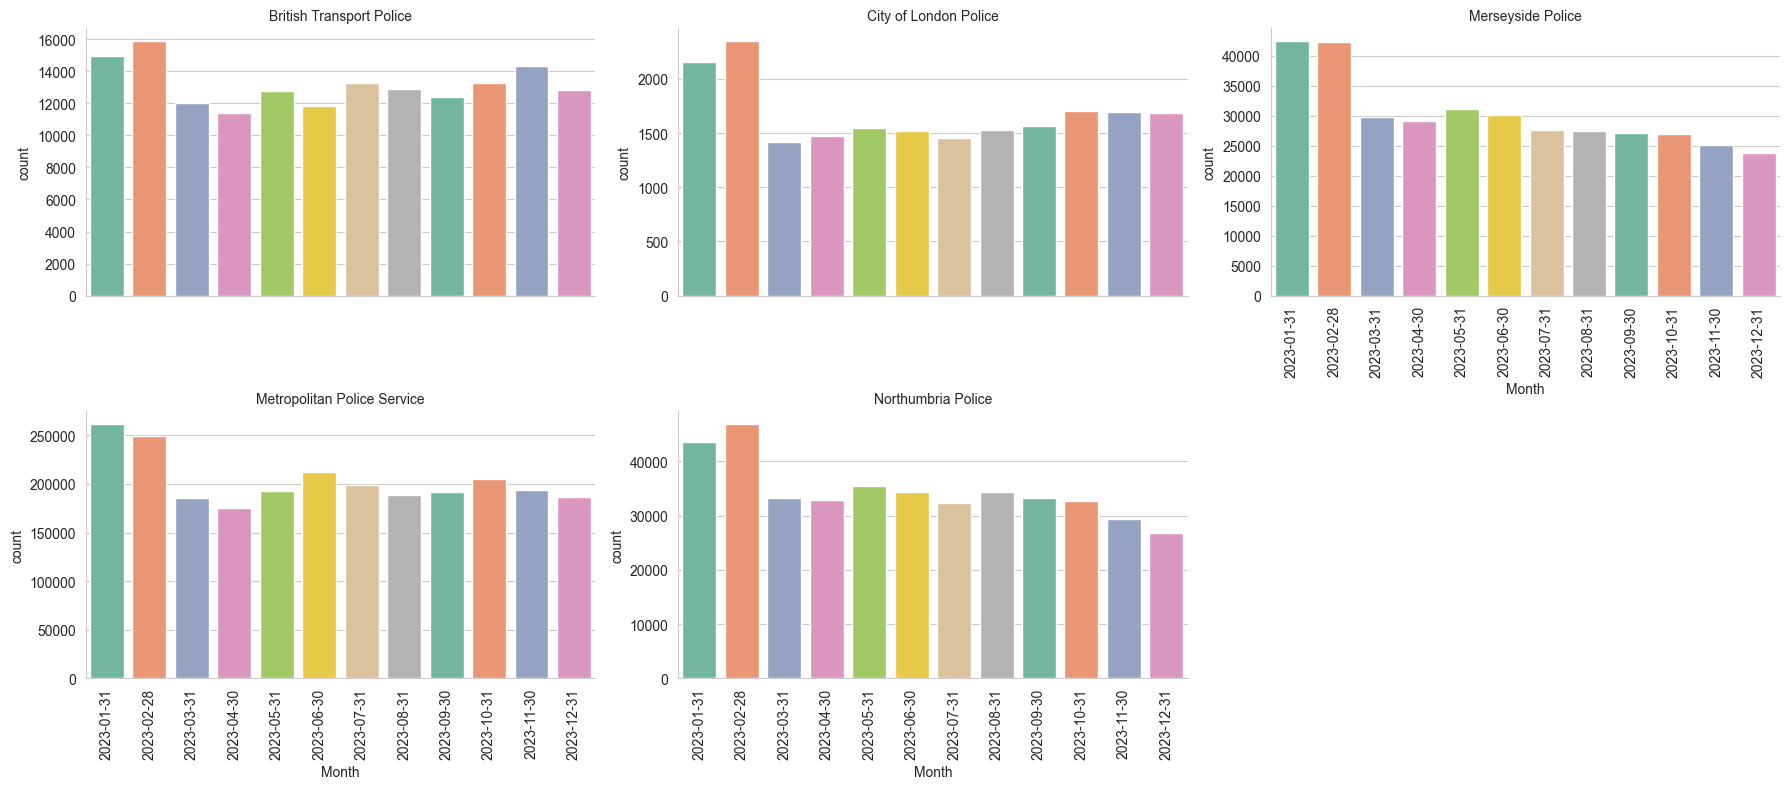

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set_style("whitegrid")

# Create a facet grid for each unique 'Falls within' category
g = sns.FacetGrid(combined_data, col="Falls within", col_wrap=3, height=4, aspect=1.5, sharey=False)

# Map a bar plot of counts of 'Crime type' for each 'Month' within each facet
g.map(sns.countplot, "Month", order=sorted(combined_data['Month'].unique()), palette="Set2")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)

# Set the title for each facet
g.set_titles("{col_name}")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


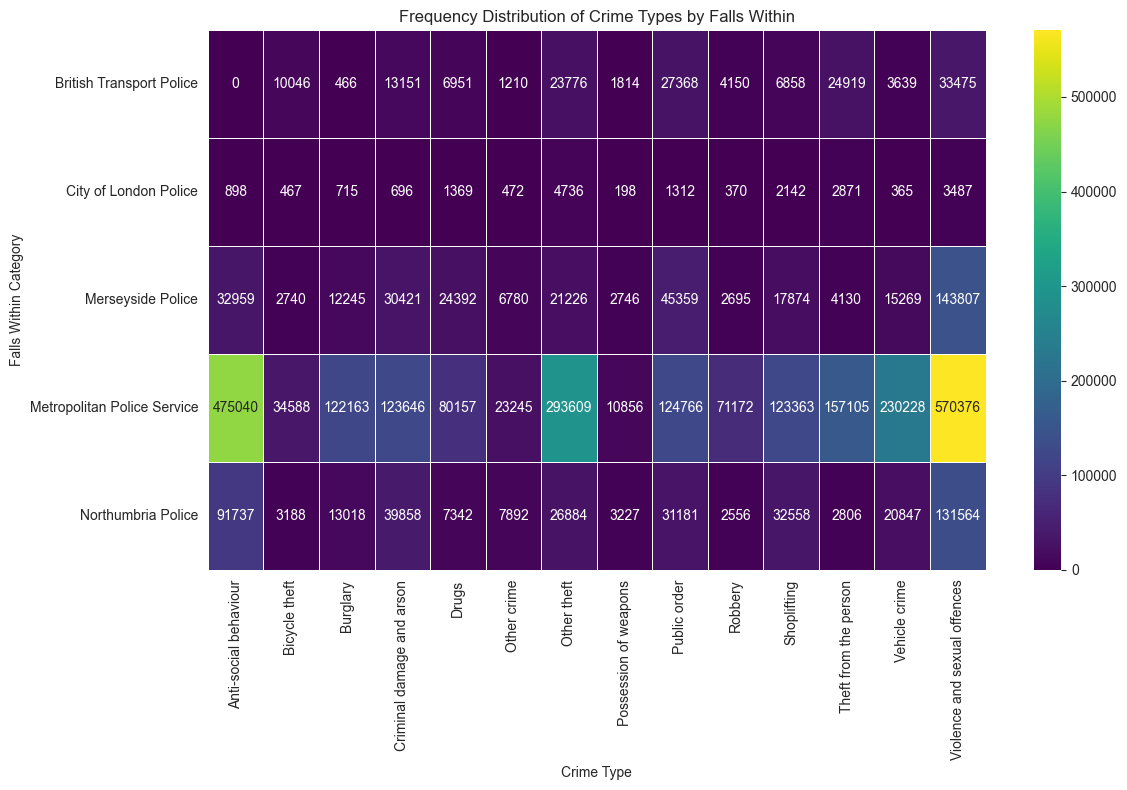

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named combined_data

# Group the data by 'Falls Within' categories and count the occurrences of each 'Crime type'
crime_counts = combined_data.groupby('Falls within')['Crime type'].value_counts().unstack().fillna(0)

# Sort the crime counts within each category to identify the most common types of crimes
crime_counts_sorted = crime_counts.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Visualize the frequency distribution of crime types for each 'Falls Within' category
plt.figure(figsize=(12, 8))
sns.heatmap(crime_counts_sorted, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Frequency Distribution of Crime Types by Falls Within')
plt.xlabel('Crime Type')
plt.ylabel('Falls Within Category')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


ValueError: num must be an integer with 1 <= num <= 4, not 5

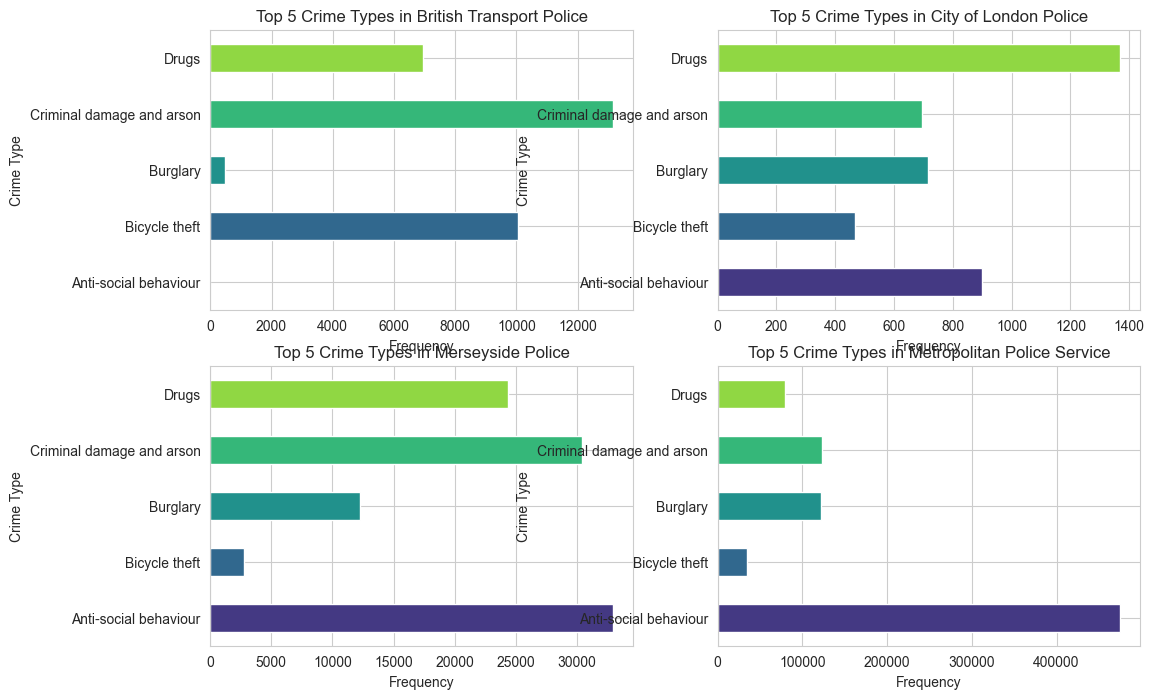

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named combined_data

# Set the number of top crime types to display for each category
top_n = 5

# Group the data by 'Falls Within' categories and count the occurrences of each 'Crime type'
crime_counts = combined_data.groupby('Falls within')['Crime type'].value_counts().unstack().fillna(0)

# Sort the crime counts within each category to identify the most common types of crimes
crime_counts_sorted = crime_counts.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Plot the top N most common crime types for each 'Falls Within' category
plt.figure(figsize=(12, 8))

for i, falls_within in enumerate(crime_counts_sorted.index):
    plt.subplot(2, 2, i+1)
    top_crimes = crime_counts_sorted.loc[falls_within][:top_n]
    top_crimes.plot(kind='barh', color=sns.color_palette('viridis', top_n))
    plt.title(f"Top {top_n} Crime Types in {falls_within}")
    plt.xlabel("Frequency")
    plt.ylabel("Crime Type")

plt.tight_layout()
plt.show()


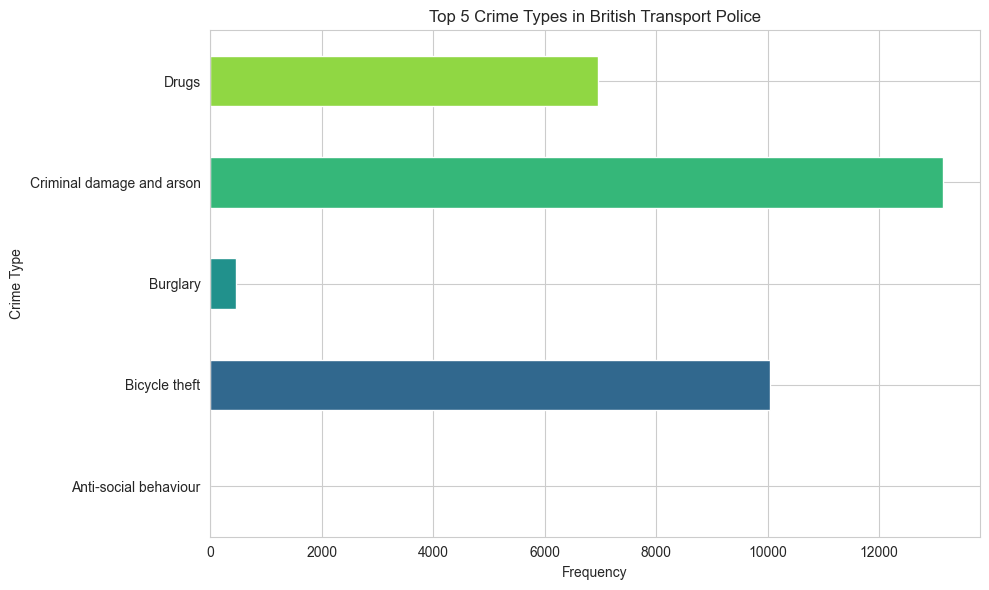

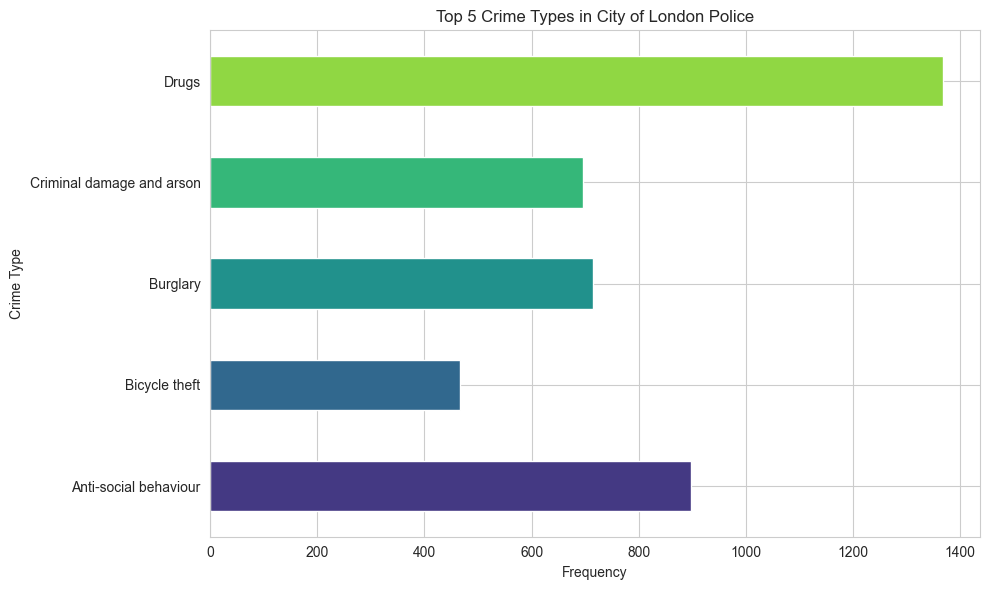

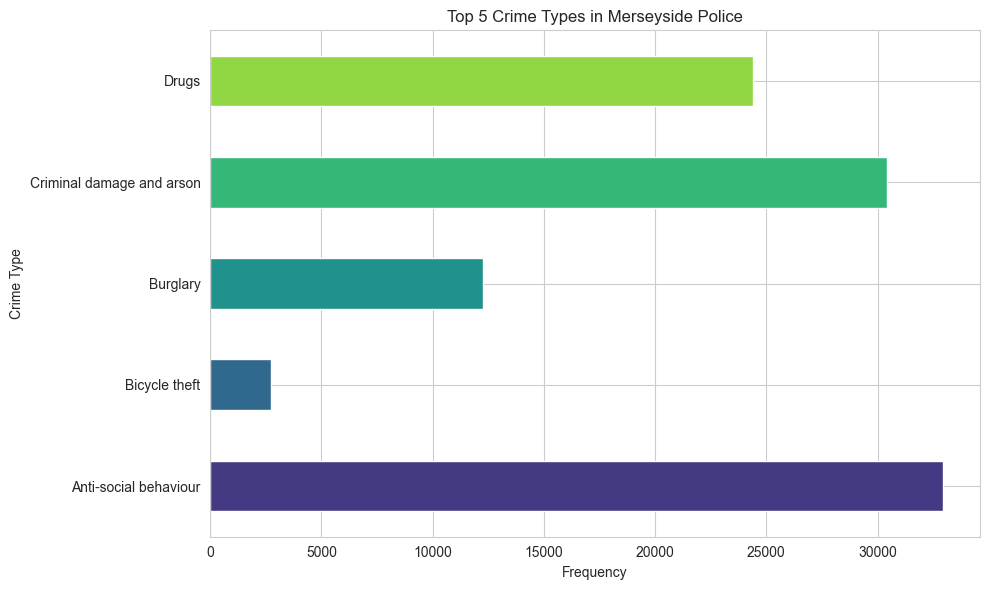

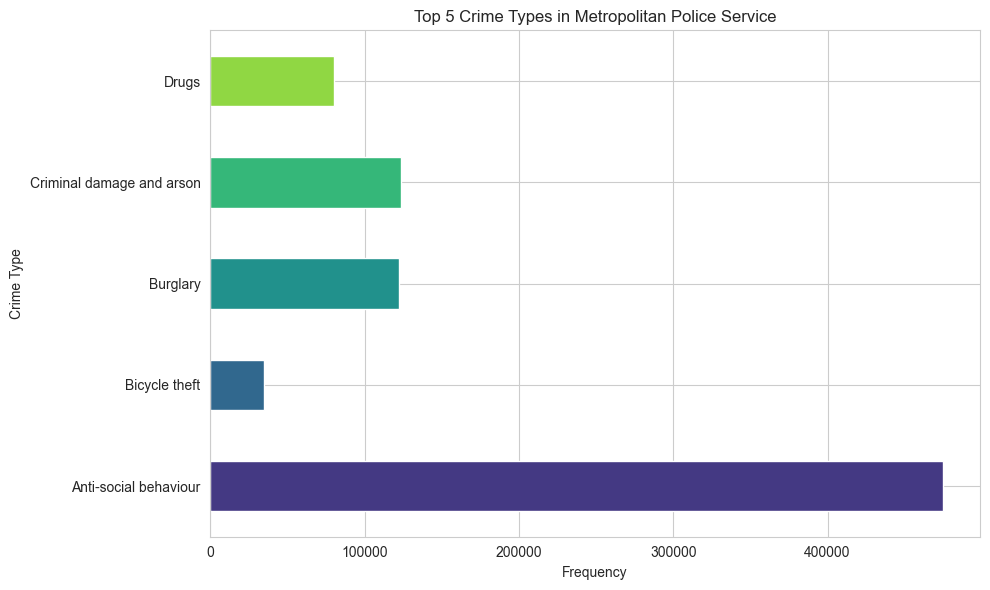

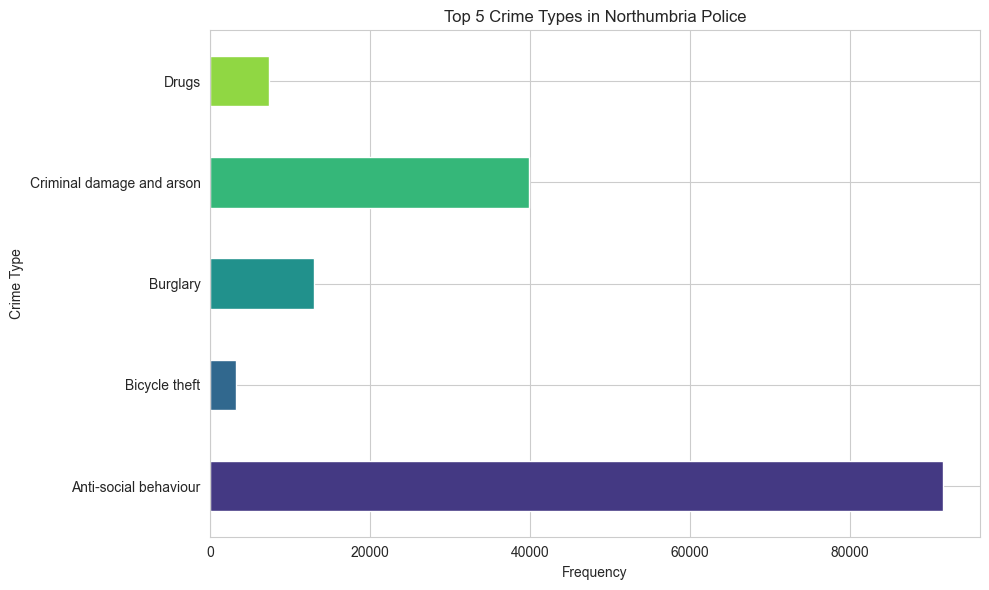

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named combined_data

# Set the number of top crime types to display for each category
top_n = 5

# Group the data by 'Falls Within' categories and count the occurrences of each 'Crime type'
crime_counts = combined_data.groupby('Falls within')['Crime type'].value_counts().unstack().fillna(0)

# Sort the crime counts within each category to identify the most common types of crimes
crime_counts_sorted = crime_counts.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Create separate plots for each 'Falls Within' category
for falls_within in crime_counts_sorted.index:
    plt.figure(figsize=(10, 6))
    top_crimes = crime_counts_sorted.loc[falls_within][:top_n]
    top_crimes.plot(kind='barh', color=sns.color_palette('viridis', top_n))
    plt.title(f"Top {top_n} Crime Types in {falls_within}")
    plt.xlabel("Frequency")
    plt.ylabel("Crime Type")
    plt.tight_layout()
    plt.show()


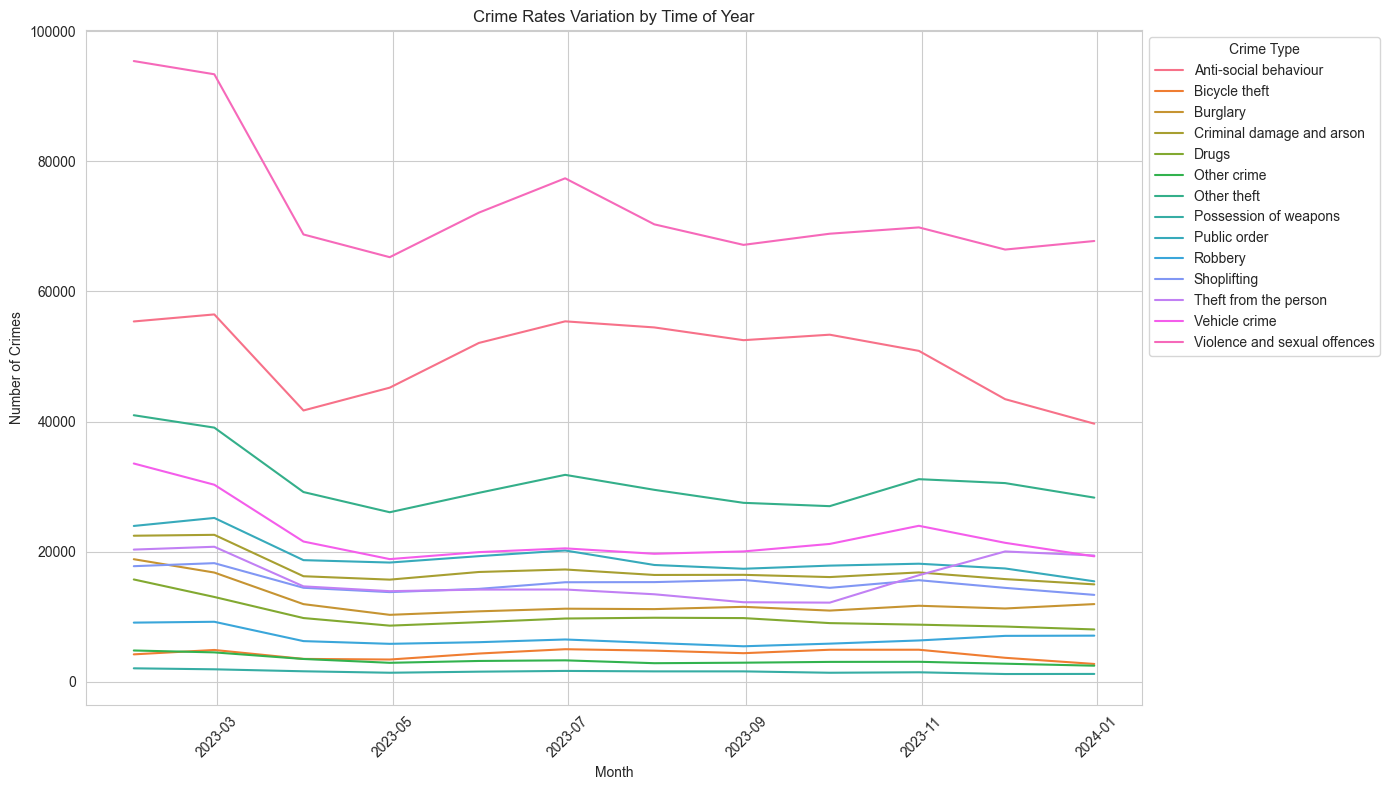

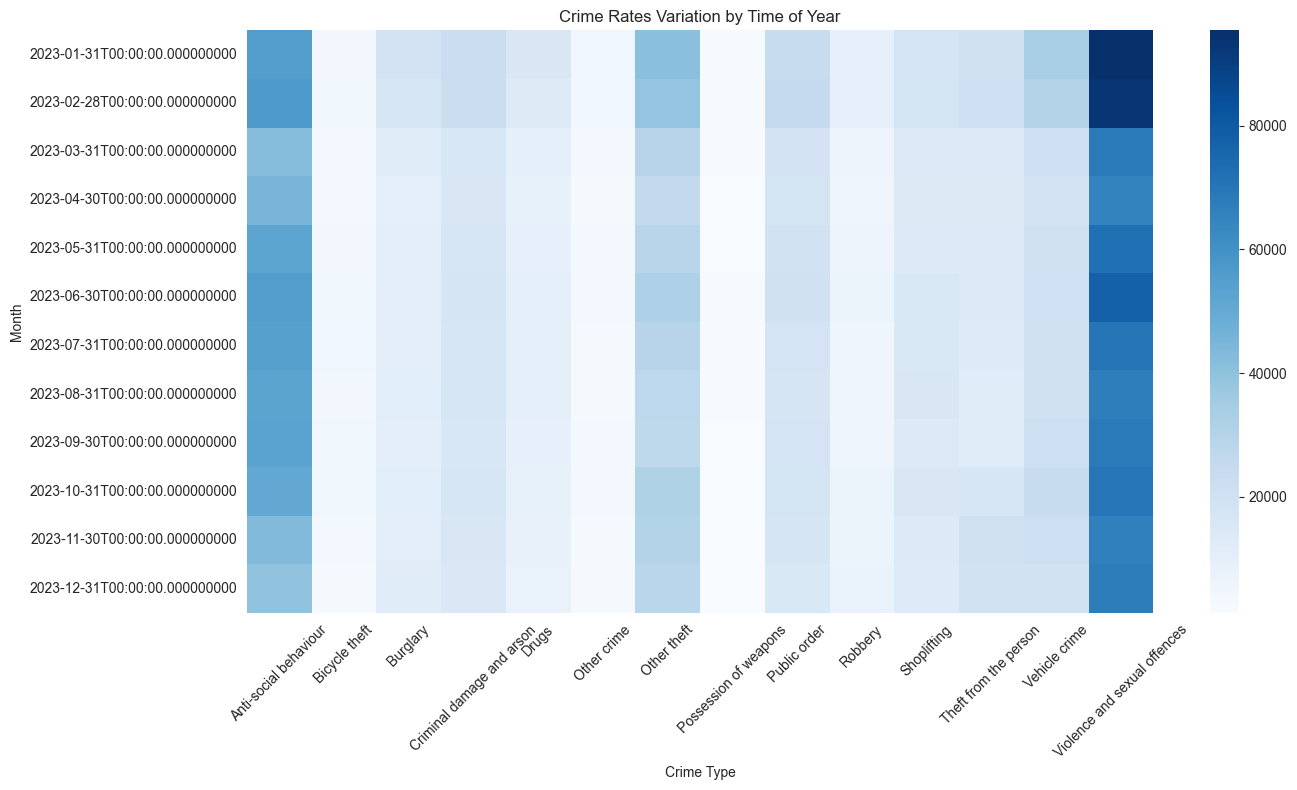

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named combined_data

# Group the data by month and 'Crime type' and count the occurrences
monthly_crime_counts = combined_data.groupby(['Month', 'Crime type']).size().unstack(fill_value=0)

# Plotting line plots for each crime type over time (month)
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_crime_counts, dashes=False)
plt.title('Crime Rates Variation by Time of Year')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Alternatively, you can use a heatmap to visualize the monthly trends
plt.figure(figsize=(14, 8))
sns.heatmap(monthly_crime_counts, cmap='Blues')
plt.title('Crime Rates Variation by Time of Year')
plt.xlabel('Crime Type')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


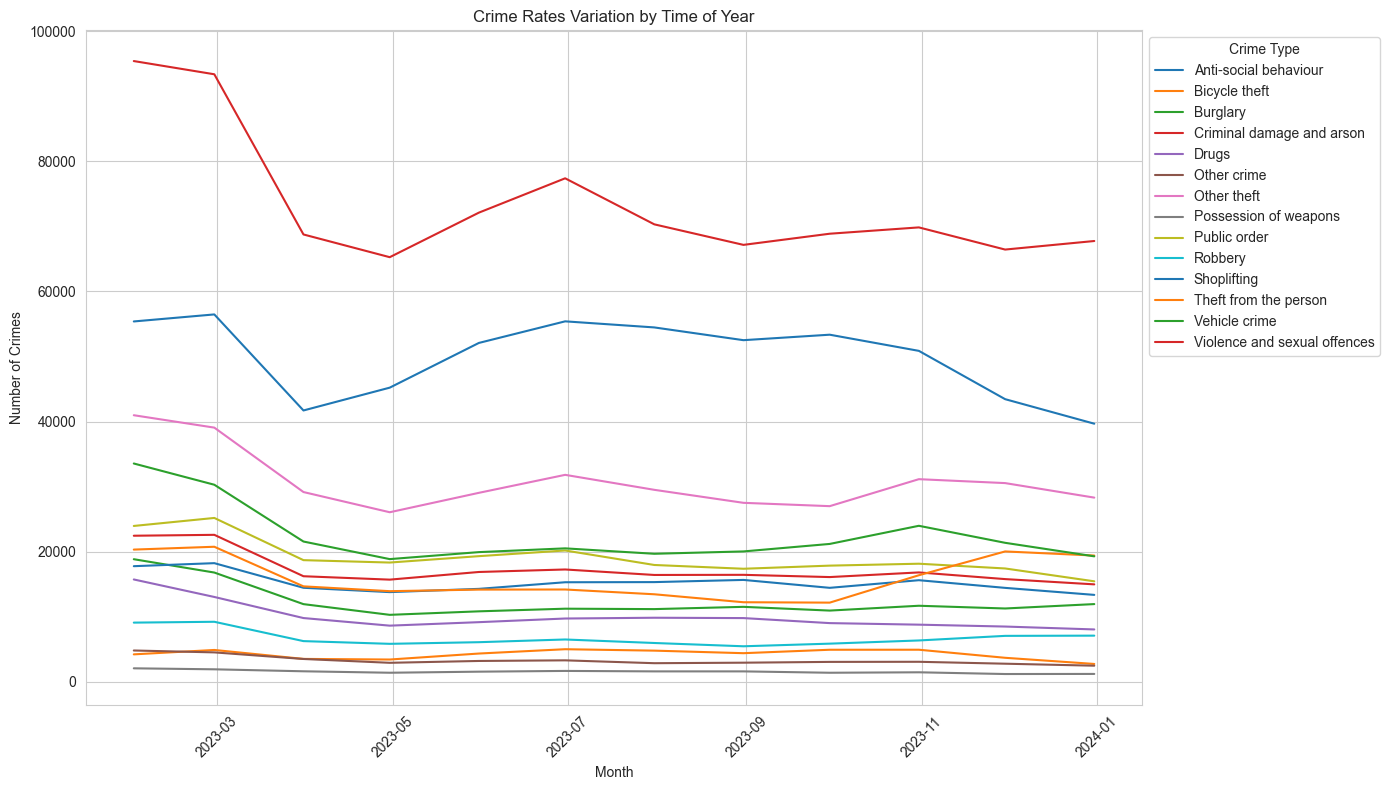

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named combined_data

# Group the data by month and 'Crime type' and count the occurrences
monthly_crime_counts = combined_data.groupby(['Month', 'Crime type']).size().unstack(fill_value=0)

# Plotting line plots for each crime type over time (month)
plt.figure(figsize=(14, 8))
palette = sns.color_palette("tab10", len(monthly_crime_counts.columns))
sns.lineplot(data=monthly_crime_counts, dashes=False, palette=palette)
plt.title('Crime Rates Variation by Time of Year')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


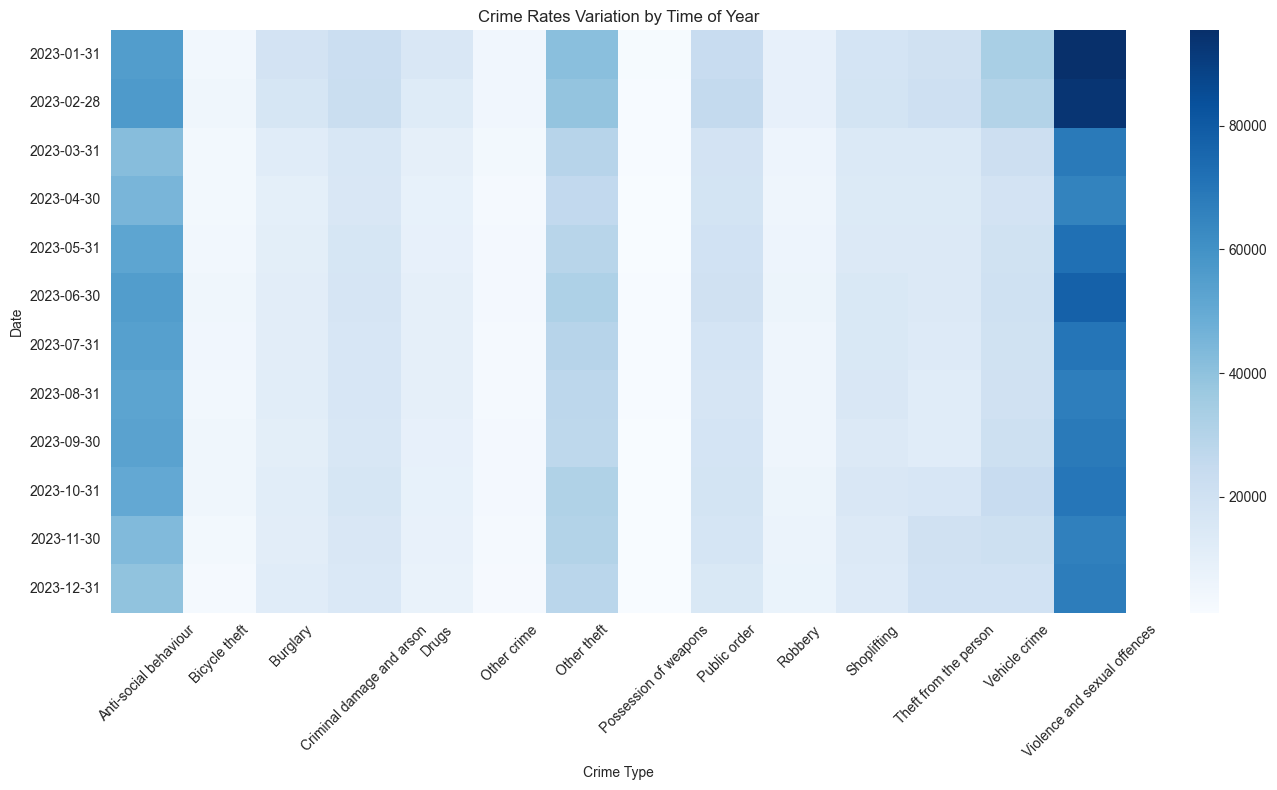

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named combined_data

# Group the data by month and 'Crime type' and count the occurrences
monthly_crime_counts = combined_data.groupby(['Month', 'Crime type']).size().unstack(fill_value=0)

# Extracting only the date part from the 'Month' column
monthly_crime_counts.index = monthly_crime_counts.index.date

# Plotting the heatmap to visualize the monthly trends
plt.figure(figsize=(14, 8))
sns.heatmap(monthly_crime_counts, cmap='Blues')
plt.title('Crime Rates Variation by Time of Year')
plt.xlabel('Crime Type')
plt.ylabel('Date')  # Labeling y-axis with 'Date' instead of 'Month'
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


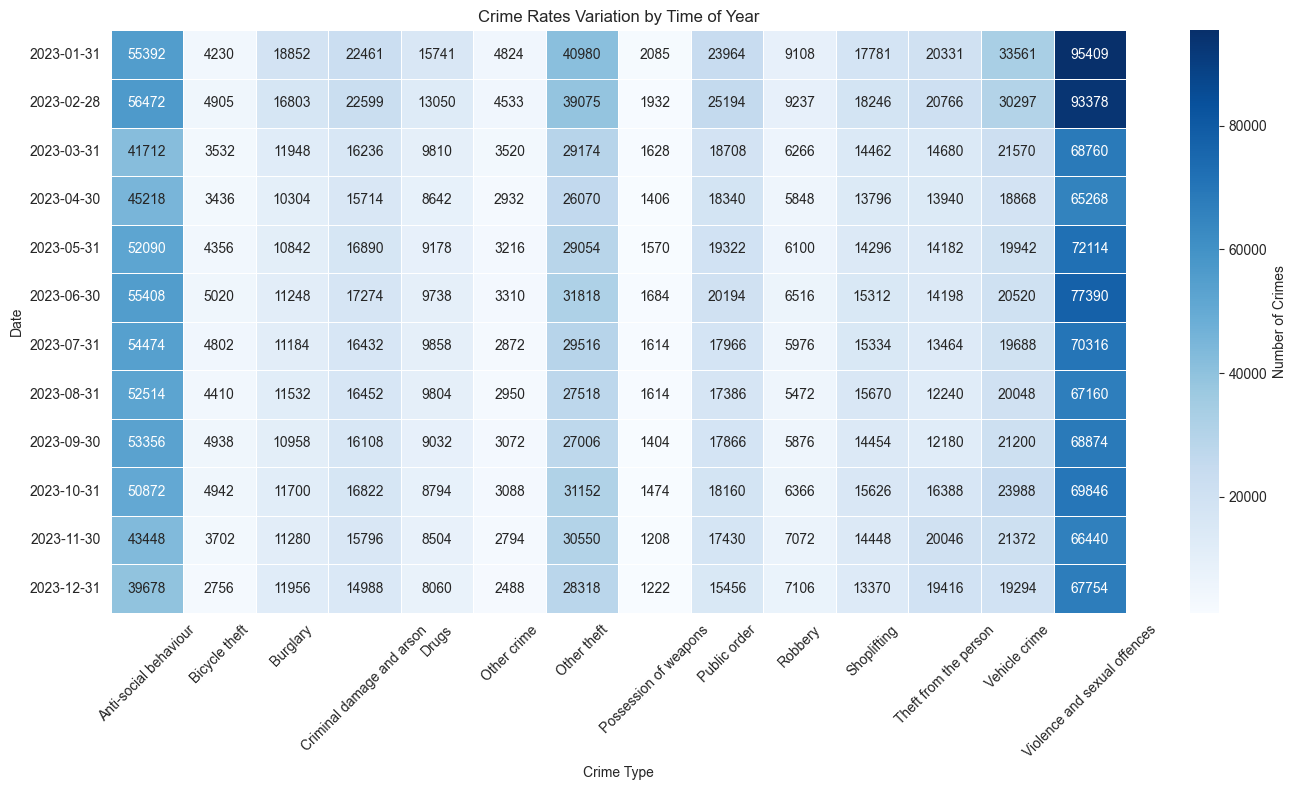

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named combined_data

# Group the data by month and 'Crime type' and count the occurrences
monthly_crime_counts = combined_data.groupby(['Month', 'Crime type']).size().unstack(fill_value=0)

# Extracting only the date part from the 'Month' column
monthly_crime_counts.index = monthly_crime_counts.index.date

# Define a custom color palette for different crime types
crime_type_palette = sns.color_palette("husl", len(monthly_crime_counts.columns))

# Plotting the heatmap with custom color palette
plt.figure(figsize=(14, 8))
sns.heatmap(monthly_crime_counts, cmap='Blues', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Crimes'})
plt.title('Crime Rates Variation by Time of Year')
plt.xlabel('Crime Type')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\USER\AppData\Local\Temp\ipykernel_24132\1687163638.py:15: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(crime_data_gdf, regions_gdf, op='within')


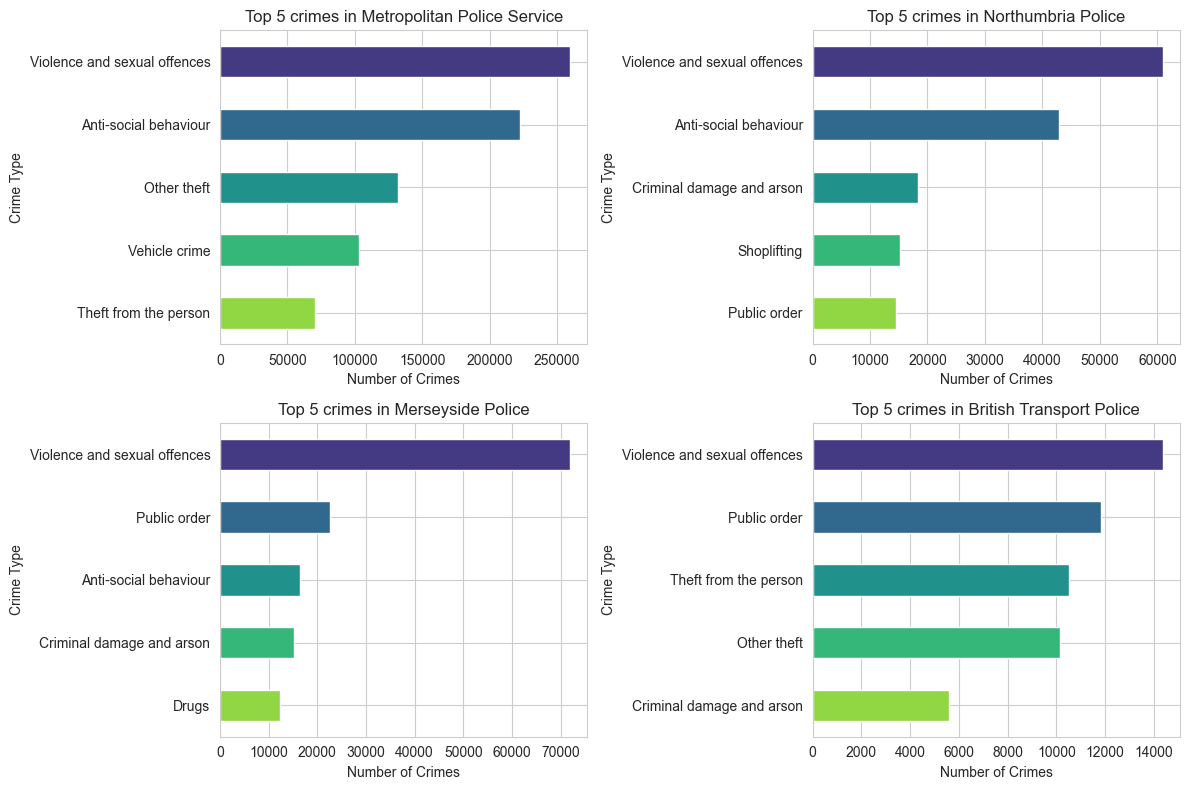

In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your data into DataFrame crime_data_df and GeoDataFrame regions_gdf

# Convert DataFrame to GeoDataFrame with geometry column
crime_data_gdf = gpd.GeoDataFrame(
    crime_data_df,
    geometry=gpd.points_from_xy(crime_data_df.Longitude, crime_data_df.Latitude)
)

# Perform spatial join
joined_gdf = gpd.sjoin(crime_data_gdf, regions_gdf, op='within')

# Count crimes by region
crime_counts = joined_gdf.groupby(['Falls within', 'Crime type']).size().unstack().fillna(0)

# Sort regions by total crimes
total_crimes = crime_counts.sum(axis=1)
crime_counts_sorted = crime_counts.loc[total_crimes.sort_values(ascending=False).index]

# Plot top crimes for each region
plt.figure(figsize=(12, 8))
n_regions = min(len(crime_counts_sorted), 4)  # Limit to maximum of 4 subplots
for i, falls_within in enumerate(crime_counts_sorted.index[:n_regions]):
    plt.subplot(2, 2, i+1)
    top_crimes = crime_counts_sorted.loc[falls_within].nlargest(5)
    top_crimes.plot(kind='barh', color=sns.color_palette('viridis', 5))
    plt.title(f'Top 5 crimes in {falls_within}')
    plt.xlabel('Number of Crimes')
    plt.ylabel('Crime Type')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
    plt.tight_layout()

plt.show()
